In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import os


2025-12-27 21:03:31.641208: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-27 21:03:31.649947: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-27 21:03:31.718813: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-27 21:03:31.766337: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766847811.815527   10688 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766847811.82

In [3]:
# Load MNIST dataset from local files
dataset_path = os.path.join(os.getcwd(),'mnist')
X_train_path = os.path.join(dataset_path,'train_x.npy')
Y_train_path = os.path.join(dataset_path,'train_y.npy')
X_test_path = os.path.join(dataset_path,'test_x.npy')
Y_test_path = os.path.join(dataset_path,'test_y.npy')

X_train = np.load(X_train_path)
y_train = np.load(Y_train_path)
X_test = np.load(X_test_path)
y_test = np.load(Y_test_path)
X_Validation = X_train[2000:]
y_Validation = y_train[2000:]
X_train = X_train[:10000]
y_train = y_train[:10000]

print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")

Training data shape: (2574, 28, 28), Training labels shape: (2574,)
Test data shape: (644, 28, 28), Test labels shape: (644,)


In [24]:
model = Sequential([
  Flatten(input_shape = (28,28)),
  Dense(16,activation='relu'),
  Dense(32,activation='relu'),
  Dense(64,activation='relu'),
  Dense(32,activation='relu'),
  Dense(16,activation='relu'),
  Dense(10,activation='softmax')
])

model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=1000,batch_size=32, validation_data=(X_Validation, y_Validation))


Epoch 1/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1262 - loss: 6.2214 - val_accuracy: 0.1603 - val_loss: 2.2977
Epoch 2/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1620 - loss: 2.2301 - val_accuracy: 0.1777 - val_loss: 2.2655
Epoch 3/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2050 - loss: 2.1193 - val_accuracy: 0.2073 - val_loss: 2.2099
Epoch 4/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2628 - loss: 2.0050 - val_accuracy: 0.2160 - val_loss: 2.0965
Epoch 5/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2835 - loss: 1.9099 - val_accuracy: 0.2840 - val_loss: 2.0697
Epoch 6/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3172 - loss: 1.8452 - val_accuracy: 0.2735 - val_loss: 2.0117
Epoch 7/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3357 - loss: 1.7459 - val_accuracy: 0.3101 - val_loss: 2.0504
Epoch 8/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3695 - loss: 1.7061 - val_accuracy: 0.

In [28]:
loss,accuracy = model.evaluate(X_train,y_train,verbose=1)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8702 - loss: 0.3662


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted digit: 3


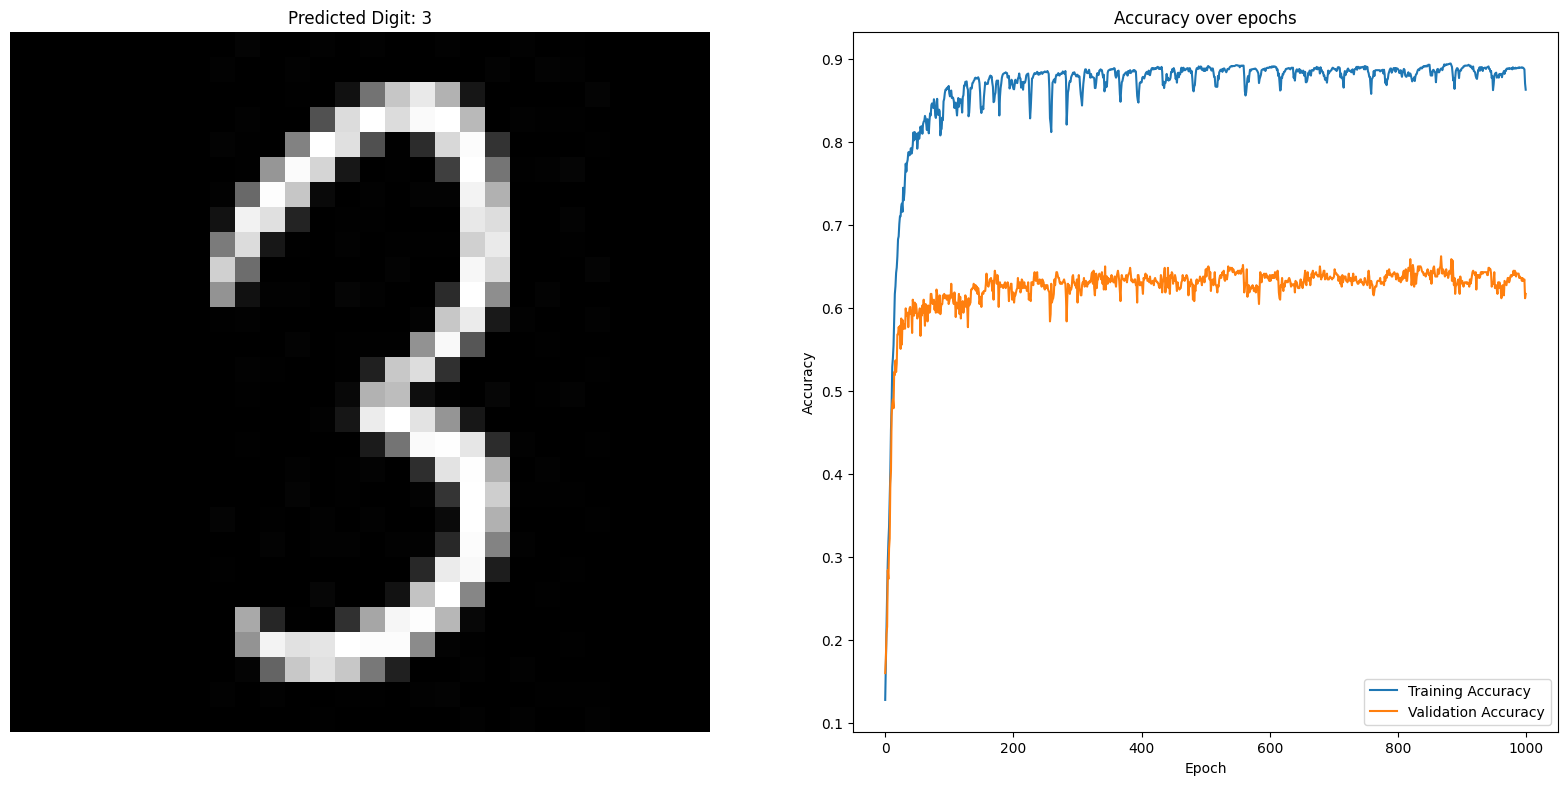

In [31]:

# visualize a sample

test_image = X_test[3] 

prediction = model.predict(test_image[np.newaxis, ...])
predicted_label = np.argmax(prediction)
print("Predicted digit:", predicted_label)

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(test_image, cmap='gray')
plt.title(f'Predicted Digit: {predicted_label}')
plt.axis('off')

plt.subplot(2,2,2)
plt.plot(model.history.history['accuracy'], label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

plt.show()
